In [1]:
%load_ext autoreload
%autoreload 2
import attiicc as ac
from attiicc.segmentation.sam import SamSegmenter
import os
from experiment import NanoExperiment
from importlib import reload
reload(ac)

<module 'attiicc' from '/media/ss4tbSSD/EDYER/nanowell_processing/ATTIICC/attiicc/__init__.py'>

In [2]:
image_path = "/media/ss4tbSSD/EDYER/nanowell_processing/images/p00_0_A01f00d0_2.png"
segment_img_save = "/media/ss4tbSSD/EDYER/nanowell_processing/sam_test_seg.png"
masks_img_save = "/media/ss4tbSSD/EDYER/nanowell_processing/sam_test_masks.png"
roi_path = "/home/ecdyer/labshare/LL07132018/NanoTry20231211/20X_H2O2_3_hours/ROIS"
model_path = "/media/ss4tbSSD/EDYER/nanowell_processing/weights/sam_vit_h_4b8939.pth"
tif_image_path = "/media/ss4tbSSD/EDYER/nanowell_processing/p00_0_A01f00d0.TIF"

In [3]:
test_sam = SamSegmenter(model_path=model_path, png_path=image_path)

CUDA is available.
Number of CUDA devices: 1
Model Loaded
PNG Path:  /media/ss4tbSSD/EDYER/nanowell_processing/images/p00_0_A01f00d0_2.png


In [ ]:
test_sam.plot_segmented_image(save=True, save_path=segment_img_save)
test_sam.plot_masks(save=True, save_path=masks_img_save)

Duplicate Value 1: (205, 905) Duplicate Value 2: (205, 905)
Duplicate Value 1: (493, 427) Duplicate Value 2: (494, 427)
Duplicate Value 1: (570, 65) Duplicate Value 2: (571, 66)
Duplicate Value 1: (850, 69) Duplicate Value 2: (851, 69)
Total number of ROIs:  73
Saving ROIs to:  /home/ecdyer/labshare/LL07132018/NanoTry20231211/20X_H2O2_3_hours/ROIS/p00_0_A01f00d0_2
ROIs saved for p00_0_A01f00d0_2
Archiving ROIs to:  /home/ecdyer/labshare/LL07132018/NanoTry20231211/20X_H2O2_3_hours/ROIS/p00_0_A01f00d0_2_roi.zip
ROIs archived for p00_0_A01f00d0_2


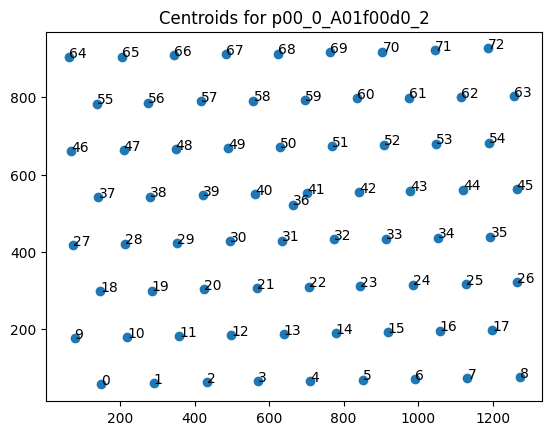

In [4]:
roi, box = test_sam.generate_rois(roi_path=roi_path, validation_plot=True)

In [5]:
# Test changing images without creating a new SamSegmenter object
tif_path = '/media/ss4tbSSD/EDYER/nanowell_processing/images/p15_0_A01f00d3.TIF'
png_path = '/media/ss4tbSSD/EDYER/nanowell_processing/images/p15_0_A01f00d3.png'
test_sam.update_image(png_path, tif_path)

PNG Path:  /media/ss4tbSSD/EDYER/nanowell_processing/images/p15_0_A01f00d3.png


### Segmenting a Whole Experiment of Images

In [5]:
experiment_path = '/media/ss4tbSSD/EDYER/nanowell_processing/test_data'
field_id = 'f'
num_fields = 2
channel_id = 'd'
num_channels = 4
time_point_id = 'p'
num_time_points = 16
segment_channel = 3

test_exp = NanoExperiment(experiment_path=experiment_path, 
                            field_id=field_id, 
                            num_fields=num_fields,
                            channel_id=channel_id, 
                            num_channels=num_channels, 
                            time_point_id=time_point_id,
                            num_time_points=num_time_points, 
                            segment_channel=segment_channel, 
                            field_leading_zero=True,
                            time_point_leading_zero=True)

print(test_exp.structure)

Experiment Structure 
            segment_channel: 3 
            field_id: f 
            field_num: 2 
            field_leading_zero: True 
            channel_id: d 
            channel_num: 4 
            time_point_id: p 
            time_point_num: 16 
            time_point_leading_zero: True


In [3]:
model_path = "/media/ss4tbSSD/EDYER/nanowell_processing/weights/sam_vit_h_4b8939.pth"

test_exp.segment_nanowells(model_path=model_path, convert_png=True)

(2/32)  Converting image scan_Top Slide_R_p01_0_A01f00d3.TIF to .png
scan_Top Slide_R_p01_0_A01f00d3
/media/ss4tbSSD/EDYER/nanowell_processing/test_data/f00d3_png/scan_Top Slide_R_p01_0_A01f00d3
(3/32)  Converting image scan_Top Slide_R_p12_0_A01f00d3.TIF to .png
scan_Top Slide_R_p12_0_A01f00d3
/media/ss4tbSSD/EDYER/nanowell_processing/test_data/f00d3_png/scan_Top Slide_R_p12_0_A01f00d3
(8/32)  Converting image scan_Top Slide_R_p04_0_A01f00d3.TIF to .png
scan_Top Slide_R_p04_0_A01f00d3
/media/ss4tbSSD/EDYER/nanowell_processing/test_data/f00d3_png/scan_Top Slide_R_p04_0_A01f00d3
(10/32)  Converting image scan_Top Slide_R_p02_0_A01f00d3.TIF to .png
scan_Top Slide_R_p02_0_A01f00d3
/media/ss4tbSSD/EDYER/nanowell_processing/test_data/f00d3_png/scan_Top Slide_R_p02_0_A01f00d3
(11/32)  Converting image scan_Top Slide_R_p05_0_A01f00d3.TIF to .png
scan_Top Slide_R_p05_0_A01f00d3
/media/ss4tbSSD/EDYER/nanowell_processing/test_data/f00d3_png/scan_Top Slide_R_p05_0_A01f00d3
(12/32)  Converting ima

KeyError: 'p08_ff00_well8'